In [1743]:
#The purpose of this research and analysis:

#Analyse and preprocess the dataset.

#To analyze the dataset to develop actionable insights and strategies for optimizing customer acquisition with visualisation(graphs,charts,etc..).

#To find which potential clients are likely to subscribe to the product(i.e:has the client subscribed a term deposit(output)).

#Train 3 types of machine learning model, with predictive modeling.

#Calulate the MSE(Mean Squared Error) of the model.

#Pointing feature importance and build a reccomendation engine.


In [1744]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

# Load the data
df = pd.read_csv('bank-full.csv',sep=';')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [1745]:
df.tail (10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [1746]:
df.describe ()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [1747]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [1748]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [1749]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [1750]:
df.dropna (inplace=True)
df.head(5) # Conclusion: no null values

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [1751]:
df['marital'].unique() #categorical

array(['married', 'single', 'divorced'], dtype=object)

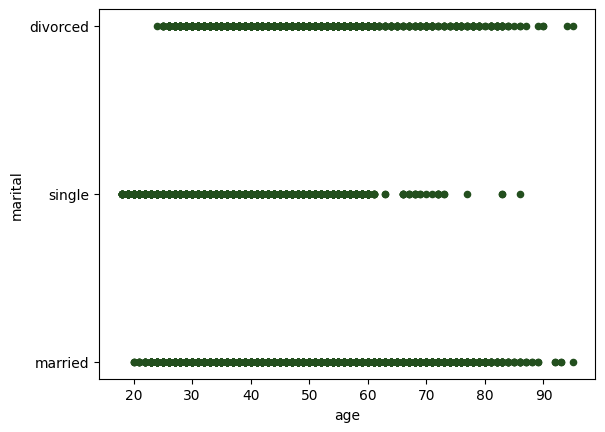

In [1752]:
df.plot(kind='scatter', x='age',y='marital', color='#234F1E')
plt.show()

In [1753]:
# Age range for the marital category.

In [1754]:
df['age'].unique() #numeric value

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [1755]:
df['job'].unique() #categorical

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [1756]:
campaign_by_job=df.groupby('job').count()
campaign_by_job
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [1757]:
subscription_by_job=df.groupby('job').count()['y']
subscription_by_job

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: y, dtype: int64

<Axes: title={'center': 'Analysis of Subscription by job'}, xlabel='job', ylabel='Subscription'>

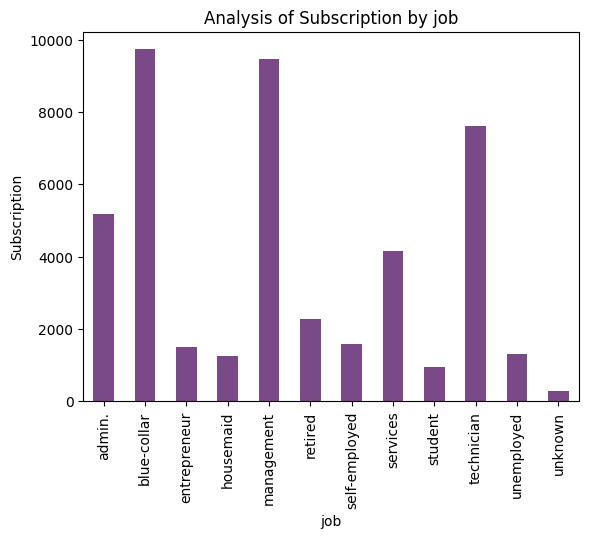

In [1758]:
subscription_by_job.plot(kind='bar',xlabel='job',ylabel='Subscription',title='Analysis of Subscription by job',color='#7A4988')

In [1759]:
#Conclusion: Blue-collar, management and technician were more likely to subscribe to the term deposit.

<Axes: title={'center': 'Analysis of Subscription by job'}, ylabel='Subscription'>

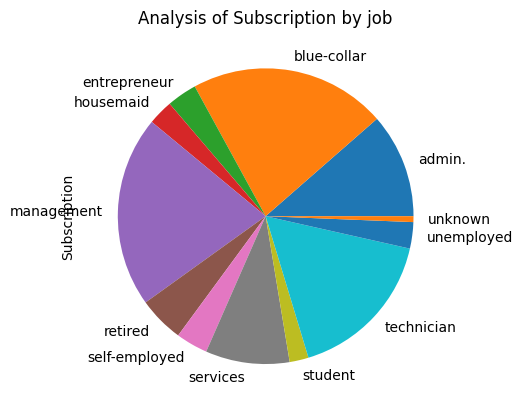

In [1760]:
subscription_by_job.plot(kind='pie',xlabel='job',ylabel='Subscription',title='Analysis of Subscription by job',color='hue')

In [1761]:
#This is the pie-chart version of the above.

In [1762]:
subscription_by_marital=df.groupby('marital').count()['y']
subscription_by_marital

marital
divorced     5207
married     27214
single      12790
Name: y, dtype: int64

<Axes: title={'center': 'Analysis of Subscription by marital'}, xlabel='marital', ylabel='Subscription'>

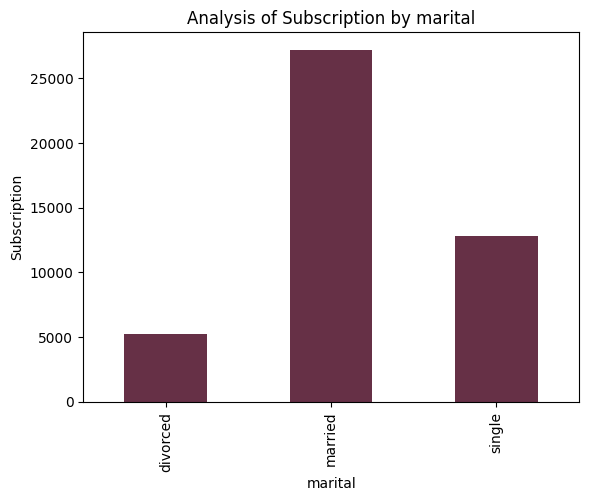

In [1763]:
subscription_by_marital.plot(kind='bar',xlabel='marital',ylabel='Subscription',title='Analysis of Subscription by marital',color='#663046')

In [1764]:
# Conclusion: Married couple were more incline to subscribe. 

In [1765]:
personalloan_by_marital=df.groupby('marital').count()['loan']
personalloan_by_marital

marital
divorced     5207
married     27214
single      12790
Name: loan, dtype: int64

<Axes: title={'center': 'Personal loan by marital'}, xlabel='marital', ylabel='PersonalLoan'>

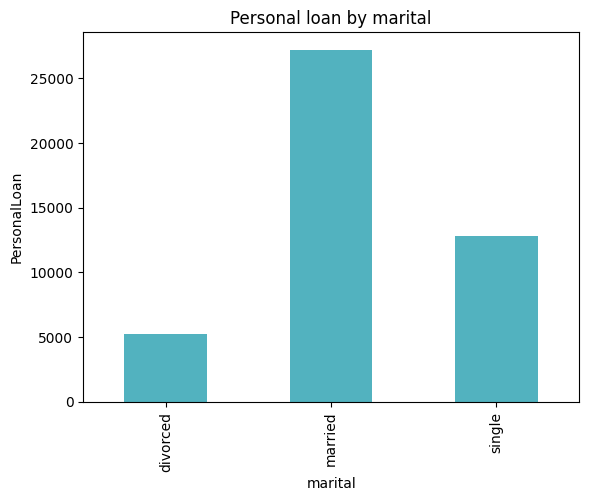

In [1766]:
personalloan_by_marital.plot(kind='bar',xlabel='marital',ylabel='PersonalLoan',title='Personal loan by marital',color='#52B2BF')

In [1767]:
# Conclusion: Married couple were more inclined to have personal loan.

In [1768]:
housingloan_by_marital=df.groupby('marital').count()['housing']
housingloan_by_marital

marital
divorced     5207
married     27214
single      12790
Name: housing, dtype: int64

<Axes: title={'center': 'Housing Loan by marital'}, xlabel='marital', ylabel='Housing Loan'>

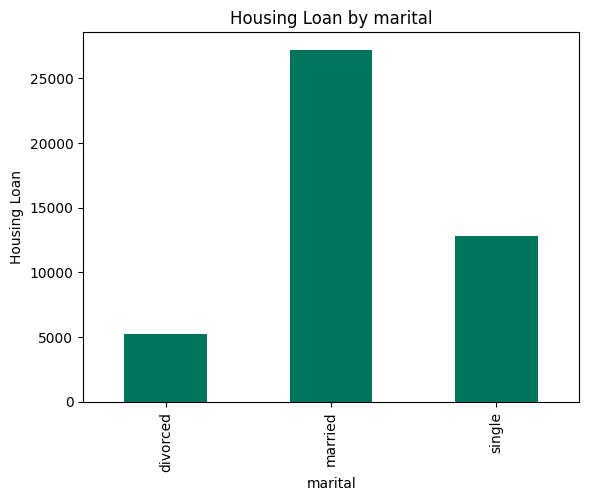

In [1769]:
housingloan_by_marital.plot(kind='bar',xlabel='marital',ylabel='Housing Loan',title='Housing Loan by marital',color='#00755E')

In [1770]:
# Conclusion: Married couple were more inclined to have housing loan.

<Axes: title={'center': 'Analysis of subscription by marital'}, ylabel='Subscription'>

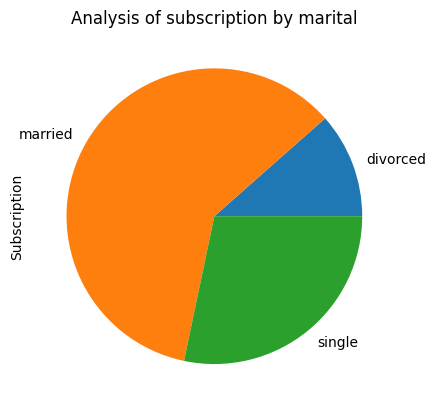

In [1771]:
subscription_by_marital.plot(kind='pie',xlabel='marital',ylabel='Subscription',title='Analysis of subscription by marital',color='hue')

In [1772]:
df['education'].unique() #categorical

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [1773]:
subscription_by_education=df.groupby('education').count()['y']
subscription_by_education

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: y, dtype: int64

<Axes: title={'center': 'Analysis of Subscription by education'}, xlabel='education', ylabel='Subscription'>

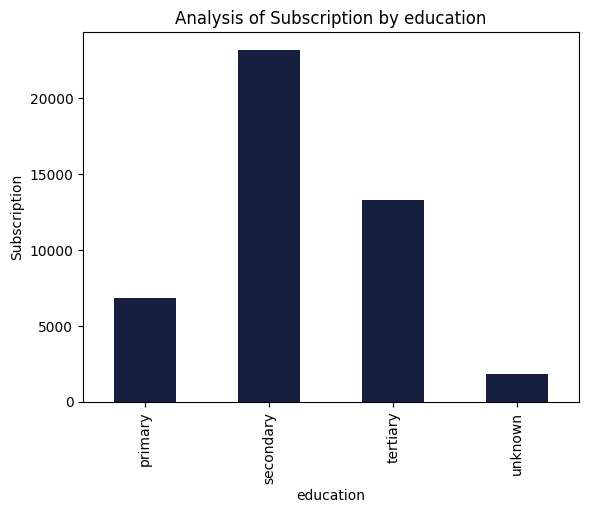

In [1774]:
subscription_by_education.plot(kind='bar',xlabel='education',ylabel='Subscription',title='Analysis of Subscription by education',color='#151E3D')

In [1775]:
# Conclusion: Secondary level people were more inclined to subscribe.

In [1776]:
df['default'].unique() #binary

array(['no', 'yes'], dtype=object)

In [1777]:
default_by_job=df.groupby('job').count()['default']
default_by_job

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: default, dtype: int64

<Axes: title={'center': 'Graph of credit in default by job'}, xlabel='job', ylabel='Credit in Default'>

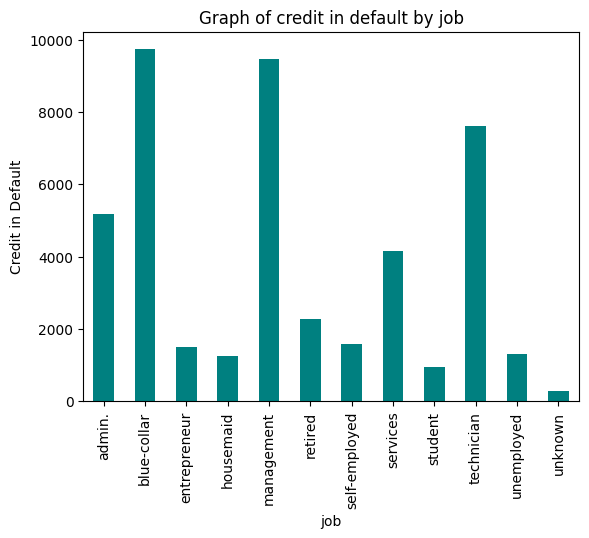

In [1778]:
default_by_job.plot(kind='bar',xlabel='job',ylabel='Credit in Default',title='Graph of credit in default by job',color='teal')

In [1779]:
# Conclusion: Blue-collar, Management and Technician were more likely to have a default in credit.

In [1780]:
df['balance'].unique() #numeric

array([ 2143,    29,     2, ...,  8205, 14204, 16353])

In [1781]:
df['housing'].unique() #binary

array(['yes', 'no'], dtype=object)

In [1782]:
df['loan'].unique() #binary

array(['no', 'yes'], dtype=object)

In [1783]:
df['contact'].unique() #categorical

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [1784]:
type_of_contact=df.groupby('contact').count()['y']
type_of_contact

contact
cellular     29285
telephone     2906
unknown      13020
Name: y, dtype: int64

<Axes: title={'center': 'Type of phone contact which were successful'}, xlabel='contact', ylabel='Subscription Success'>

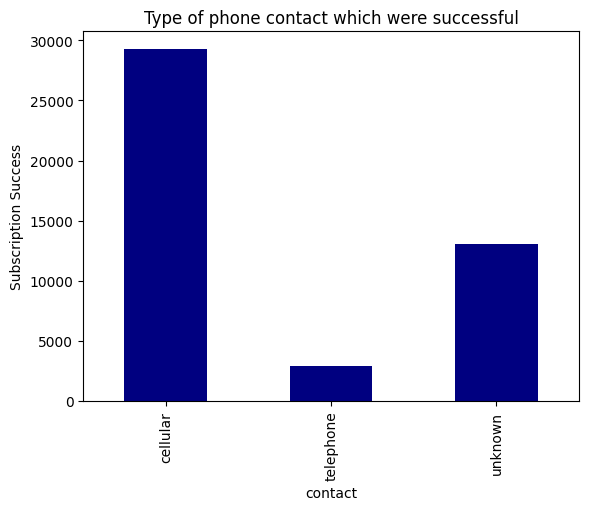

In [1785]:
type_of_contact.plot(kind='bar',xlabel='contact',ylabel='Subscription Success',title='Type of phone contact which were successful',color='navy')

In [1786]:
# Conclusion: People were most contacted by cellular.

In [1787]:
df['day'].unique() #numeric

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

<Axes: >

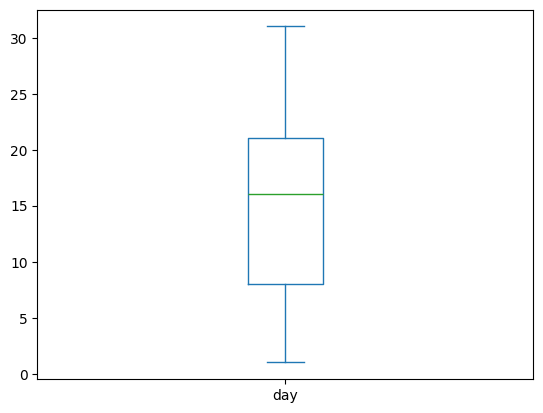

In [1788]:
df['day'].plot(kind='box')

In [1789]:
# Conclusion: No outliers for the day column.

In [1790]:
df['month'].unique() #categorical

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [1791]:
subscription_by_month=df.groupby('month').count()['y']
subscription_by_month

month
apr     2932
aug     6247
dec      214
feb     2649
jan     1403
jul     6895
jun     5341
mar      477
may    13766
nov     3970
oct      738
sep      579
Name: y, dtype: int64

<Axes: title={'center': 'Analysis of Peak Subscription by Month'}, xlabel='month', ylabel='Subscription'>

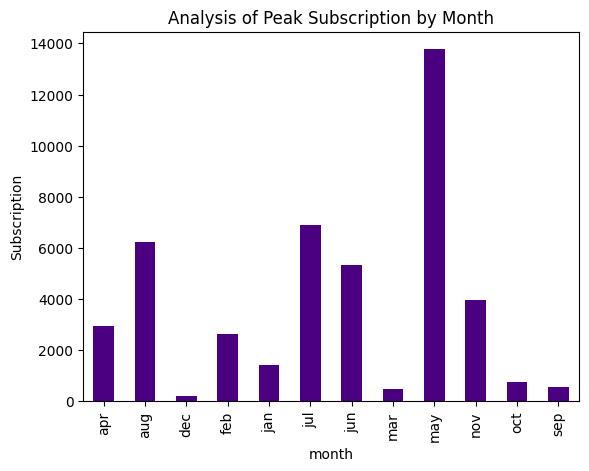

In [1792]:
subscription_by_month.plot(kind='bar',xlabel='month',ylabel='Subscription',title='Analysis of Peak Subscription by Month',color='indigo')

In [1793]:
# Conclusion: The month of May had the most subscription.

In [1794]:
df['duration'].unique() #numeric

array([ 261,  151,   76, ..., 1298, 1246, 1556])

In [1795]:
df['campaign'].unique() #numeric

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [1796]:
df['pdays'].unique() #numeric

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [1797]:
df['previous'].unique() #numeric

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41])

In [1798]:
df['poutcome'].unique() #categorical

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [1799]:
subscription_by_poutcome=df.groupby('poutcome').count()['y']
subscription_by_poutcome

poutcome
failure     4901
other       1840
success     1511
unknown    36959
Name: y, dtype: int64

<Axes: title={'center': 'Analysis of Subscription from Previous Campaign'}, xlabel='poutcome', ylabel='Subscription'>

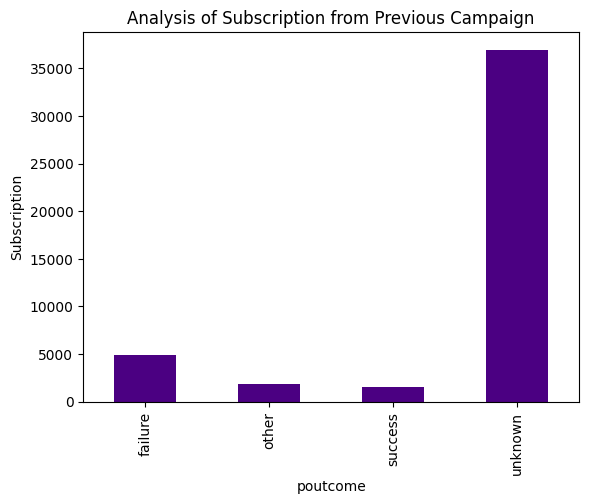

In [1800]:
subscription_by_poutcome.plot(kind='bar',xlabel='poutcome',ylabel='Subscription',title='Analysis of Subscription from Previous Campaign',color='indigo')

In [1801]:
# Conclusion: Many people were unsure on whether to subscribe to the term deposit.

In [1802]:
df['y'].unique() #output result #binary

array(['no', 'yes'], dtype=object)

In [1803]:
df.head (5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [1804]:
# Encode the categorical data
df['job'].unique()

df['job'].value_counts()

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

df['job']=encoder.fit_transform(df['job'])

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,9,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,1,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,11,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [1805]:
# Encode other classes/columns

marital_encoder=LabelEncoder()
marital_encoder.fit(df['marital'])
df['marital']=marital_encoder.fit_transform(df['marital'])

education_encoder=LabelEncoder()
education_encoder.fit(df['education'])
df['education']=education_encoder.fit_transform(df['education'])

default_encoder=LabelEncoder()
default_encoder.fit(df['default'])
df['default']=default_encoder.fit_transform(df['default'])

housing_encoder=LabelEncoder()
housing_encoder.fit(df['housing'])
df['housing']=housing_encoder.fit_transform(df['housing'])

loan_encoder=LabelEncoder()
loan_encoder.fit(df['loan'])
df['loan']=loan_encoder.fit_transform(df['loan'])

contact_encoder=LabelEncoder()
contact_encoder.fit(df['contact'])
df['contact']=contact_encoder.fit_transform(df['contact'])

month_encoder=LabelEncoder()
month_encoder.fit(df['month'])
df['month']=month_encoder.fit_transform(df['month'])

poutcome_encoder=LabelEncoder()
poutcome_encoder.fit(df['poutcome'])
df['poutcome']=poutcome_encoder.fit_transform(df['poutcome'])

y_encoder=LabelEncoder()
y_encoder.fit(df['y'])
df['y']=y_encoder.fit_transform(df['y'])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [1806]:
X=df[['age','job','marital','education','default','housing','loan','contact','month','poutcome']]
Y=df['y']

In [1807]:
X

,age,job,marital,education,default,housing,loan,contact,month,poutcome
0,58,4,1,2,0,1,0,2,8,3
1,44,9,2,1,0,1,0,2,8,3
2,33,2,1,1,0,1,1,2,8,3
3,47,1,1,3,0,1,0,2,8,3
4,33,11,2,3,0,0,0,2,8,3
...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,0,0,0,9,3
45207,71,5,0,0,0,0,0,0,9,3
45208,72,5,1,1,0,0,0,0,9,2
45209,57,1,1,1,0,0,0,1,9,3


In [1808]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [1809]:
from sklearn.model_selection import train_test_split #randomize and split the data for machine learning

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=12)

In [1810]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,poutcome
37156,35,4,2,2,0,0,0,0,8,3
20494,30,4,2,2,0,1,1,0,1,3
35272,39,4,2,2,0,1,0,0,8,3
22260,49,7,1,1,0,0,0,0,1,3
2728,28,9,2,1,0,1,0,2,8,3
...,...,...,...,...,...,...,...,...,...,...
36482,29,4,2,2,0,1,0,0,8,3
40177,53,4,0,2,0,0,1,0,6,3
19709,32,4,2,2,0,0,0,0,1,3
38555,57,9,1,1,0,1,0,1,8,0


In [1811]:
from sklearn.linear_model import LinearRegression #Model 1

lr_model=LinearRegression()

lr_model.fit(X_train,Y_train) #Training using the training data

y_pred=lr_model.predict(X_test)

y_pred



array([1.15493528e-01, 1.30626144e-01, 6.01648213e-02, ...,
       1.73824872e-01, 1.99766296e-01, 1.28600927e-04])

In [1812]:
from sklearn.metrics import mean_squared_error #Evaluate the model.

mse=mean_squared_error(Y_test, y_pred)

import math #import math library

x=math.sqrt(mse)

x

0.31260929544183724

In [1813]:
score=lr_model.score(X_test,Y_test) #Accuracy of the model

print(f'Model score: {score*100:.2f}%')

Model score: 4.56%


In [1814]:
# Making a prediction

prediction=lr_model.predict([[53, 4, 0, 2, 0, 0, 1, 0, 6, 3]])

prediction

c:\Users\dhani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.13710942])

In [1815]:
from sklearn.linear_model import LogisticRegression #Model 2

log_model=LogisticRegression(max_iter=500,solver='newton-cg')

log_model.fit(X_train,Y_train) #Training using the training data

y_pred=log_model.predict(X_test)

y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [1816]:
score=log_model.score(X_test,Y_test) #Accuracy of the model

print(f'Model score: {score*100:.2f}%')

Model score: 88.42%


In [1817]:
from sklearn.ensemble import RandomForestClassifier #Model 3

random_model=RandomForestClassifier()

random_model.fit(X_train,Y_train) #Training using the training data

y_pred=random_model.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [1818]:
score=random_model.score(X_test,Y_test) #Accuracy of the model

print(f'Model score: {score*100:.2f}%')

Model score: 87.18%


In [1819]:
from sklearn.tree import DecisionTreeClassifier #Model 4

tree_model=DecisionTreeClassifier()

tree_model.fit(X_train,Y_train) #Training using the data

y_pred=tree_model.predict(X_test)

y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [1820]:
score=tree_model.score(X_test,Y_test) #Accuracy of the model

print(f'Model score: {score*100:.2f}%')

Model score: 85.19%


In [1821]:
#Plotting Graph for model accuracy

models = ['lr_model', 'log_model', 'random_model', 'tree_model']
accuracy = [4.56, 88.42, 87.33, 85.06]


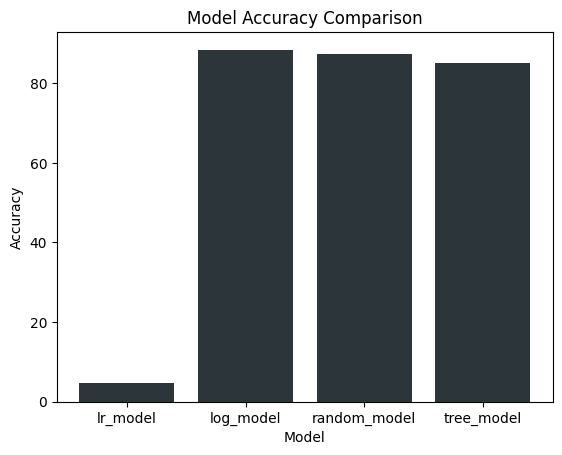

In [1822]:
# Plotting a Bar Chart

plt.bar(models, accuracy, color='#2C3539')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Display the chart
plt.show()

In [1823]:
# Conclusion: The Logistic Regression Model has the most accurate score.